In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# exclude rows with TotalCharges column contains white space
df = df.loc[~df['TotalCharges'].str.contains(' ')]

# transform TotalCharges col to float
df['TotalCharges'] = df['TotalCharges'].astype(float)

### **Standard Data Cleansing** ###

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


As we can see from the data above, there are no missing data on a new dataset so that we don't need to do a missing data cleansing. But lets check it out first:

In [ ]:
# missing data check
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Now lets check the duplicate data:

In [ ]:
# duplicated data check
df.duplicated().sum()

0

And also there are no duplicated data in the dataset.

Well, all done about data cleansing!

### **Standard Exploratory Data Analysis** ###

In [ ]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2961,6898-MDLZW,Male,0,No,No,12,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Mailed check,53.75,648.65,No
2774,9375-MHRRS,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,No,Mailed check,50.05,288.35,No
3661,1142-IHLOO,Female,0,No,No,51,Yes,No,Fiber optic,No,...,No,No,Yes,Yes,One year,No,Credit card (automatic),87.55,4475.90,No
1961,4445-KWOKW,Female,0,No,No,42,Yes,Yes,DSL,Yes,...,No,No,No,No,One year,Yes,Bank transfer (automatic),60.15,2421.60,No
6412,6519-ZHPXP,Female,0,Yes,Yes,72,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),108.30,7679.65,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [ ]:
# i want to change SeniorCitizen dtype from int64 to object
df['SeniorCitizen'] = df['SeniorCitizen'].map({0: 'No', 1: 'Yes'})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   object 
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [ ]:
categoricals = ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
        'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
        'StreamingTV', 'StreamingMovies', 'Contract','PaperlessBilling', 'PaymentMethod', 'Churn']
numericals = ['tenure', 'MonthlyCharges', 'TotalCharges']

In [ ]:
# Statistical summary of numeric columns
df[numericals].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [ ]:
for col in numericals:
  print(f"Value counts of {col} column")
  print(df[col].value_counts(), '\n')

Value counts of tenure column
1     613
72    362
2     238
3     200
4     176
     ... 
38     59
28     57
39     56
44     51
36     50
Name: tenure, Length: 72, dtype: int64 

Value counts of MonthlyCharges column
20.05     61
19.90     44
19.95     44
19.85     44
19.65     43
          ..
23.65      1
114.70     1
43.65      1
87.80      1
78.70      1
Name: MonthlyCharges, Length: 1584, dtype: int64 

Value counts of TotalCharges column
20.20      11
19.75       9
20.05       8
19.90       8
19.65       8
           ..
6849.40     1
692.35      1
130.15      1
3211.90     1
6844.50     1
Name: TotalCharges, Length: 6530, dtype: int64 



Observation:

1. Tenure: The average tenure of customers is approximately 32.421 months, with a wide range from 0 to 72 months. The majority of customers have a tenure between 9 and 55 months, indicating a relatively long-term customer base. However, there is a significant variation in tenure, as indicated by the large standard deviation.

2. MonthlyCharges: The average monthly charges for customers amount to approximately 64.798 USD. The range of monthly charges varies from 18.250  to 118.750 USD. Most customers fall within the range of 35.587 USD to 89.862 USD, indicating a diverse pricing structure. There is a considerable variation in monthly charges, as reflected by the standard deviation.

3. TotalCharges: The average total charges for customers are around 2283.300 USD. The total charges range from 18.800 USD to 8684.800 USD. The majority of customers have total charges between 401.450 USD and 3794.737 USD, highlighting a wide range of spending patterns. The standard deviation indicates a significant variation in total charges among customers.

These insights provide a general understanding of the tenure, monthly charges, and total charges distribution among the customer base, allowing for further analysis and decision-making regarding customer retention strategies and pricing strategies.

Lets see them in the plot of field's distributions below:

<ipython-input-16-b2d78d97bf3e>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df['tenure'].values, ax=axes[0])
<ipython-input-16-b2d78d97bf3e>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df['MonthlyCharges'].values, ax=axes[1])
<ipython-input-16-b2d78d97bf3e>:17: UserWarning: 

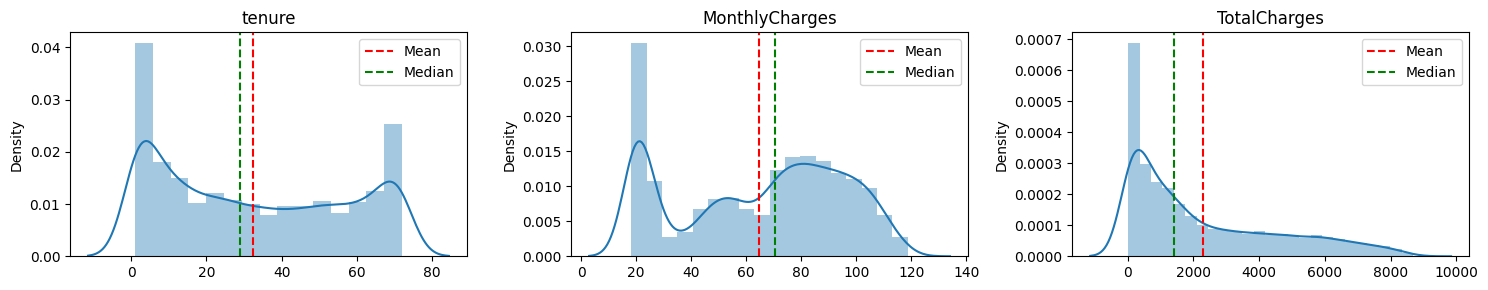

In [ ]:
# Univariate analysis for numeric variables
fig, axes = plt.subplots(1, 3, figsize=(15, 3))

#plotting
ax = sns.distplot(df['tenure'].values, ax=axes[0])
ax.set_title('tenure')
ax.axvline(df['tenure'].mean(), color='r', linestyle='--', label='Mean')
ax.axvline(df['tenure'].median(), color='g', linestyle='--', label='Median')
ax.legend()

ax = sns.distplot(df['MonthlyCharges'].values, ax=axes[1])
ax.set_title('MonthlyCharges')
ax.axvline(df['MonthlyCharges'].mean(), color='r', linestyle='--', label='Mean')
ax.axvline(df['MonthlyCharges'].median(), color='g', linestyle='--', label='Median')
ax.legend()

ax = sns.distplot(df['TotalCharges'].values, ax=axes[2])
ax.set_title('TotalCharges')
ax.axvline(df['TotalCharges'].mean(), color='r', linestyle='--', label='Mean')
ax.axvline(df['TotalCharges'].median(), color='g', linestyle='--', label='Median')
ax.legend()

plt.tight_layout()
plt.show()

From the plots that have been created, it seems like none of the fields above are normal but here are some conclusions that can be drawn for each plot:

1. *Tenure*: The distribution of tenure shows a slightly symmetric tendency with a peak around the middle values. The red line (Mean) and the green line (Median) are almost in the same position, indicating that the data is centered around the middle value. This suggests that customers tend to stay for a relatively long period of time.

2. *MonthlyCharges*: The distribution of MonthlyCharges exhibits a left-skewed pattern. The red line (Mean) is to the left of the green line (Median), indicating a shift to the left in the distribution. Therefore, it can be concluded that the majority of customers have relatively low MonthlyCharges.

3. *TotalCharges*: The distribution of TotalCharges also shows skewness, with a longer tail on the right side. The red line (Mean) is slightly to the right of the green line (Median), indicating a shift to the right in the distribution (right-skewed). Hence, it can be inferred that the majority of customers have relatively high TotalCharges.

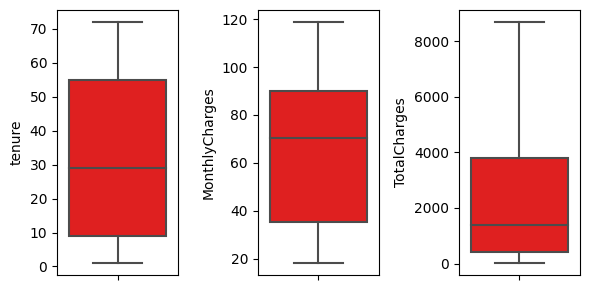

In [ ]:
# Boxplot to detect outliers
plt.figure(figsize=(6,3))

#plotting
features = numericals
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='red')
    plt.tight_layout()

Well, no outliers were found!

In [ ]:
# Statistical summary of categorical columns
for col in categoricals:
  print(f"Value counts of {col} column")
  print(df[col].describe(), '\n')

Value counts of customerID column
count           7032
unique          7032
top       7590-VHVEG
freq               1
Name: customerID, dtype: object 

Value counts of gender column
count     7032
unique       2
top       Male
freq      3549
Name: gender, dtype: object 

Value counts of SeniorCitizen column
count     7032
unique       2
top         No
freq      5890
Name: SeniorCitizen, dtype: object 

Value counts of Partner column
count     7032
unique       2
top         No
freq      3639
Name: Partner, dtype: object 

Value counts of Dependents column
count     7032
unique       2
top         No
freq      4933
Name: Dependents, dtype: object 

Value counts of PhoneService column
count     7032
unique       2
top        Yes
freq      6352
Name: PhoneService, dtype: object 

Value counts of MultipleLines column
count     7032
unique       3
top         No
freq      3385
Name: MultipleLines, dtype: object 

Value counts of InternetService column
count            7032
unique           

It shows that customerID has all unique data for each row so that i will exclude it from categoricals.

In [ ]:
categoricals = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
        'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
        'StreamingTV', 'StreamingMovies', 'Contract','PaperlessBilling', 'PaymentMethod', 'Churn']
numericals = ['tenure', 'MonthlyCharges', 'TotalCharges']

In [ ]:
# Check the value counts for each categoric feature
for col in categoricals:
  print(f"Value counts of {col} column")
  print(df[col].value_counts(), '\n')

Value counts of gender column
Male      3549
Female    3483
Name: gender, dtype: int64 

Value counts of SeniorCitizen column
No     5890
Yes    1142
Name: SeniorCitizen, dtype: int64 

Value counts of Partner column
No     3639
Yes    3393
Name: Partner, dtype: int64 

Value counts of Dependents column
No     4933
Yes    2099
Name: Dependents, dtype: int64 

Value counts of PhoneService column
Yes    6352
No      680
Name: PhoneService, dtype: int64 

Value counts of MultipleLines column
No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64 

Value counts of InternetService column
Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64 

Value counts of OnlineSecurity column
No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64 

Value counts of OnlineBackup column
No                     3087
Yes                    2425
No inte

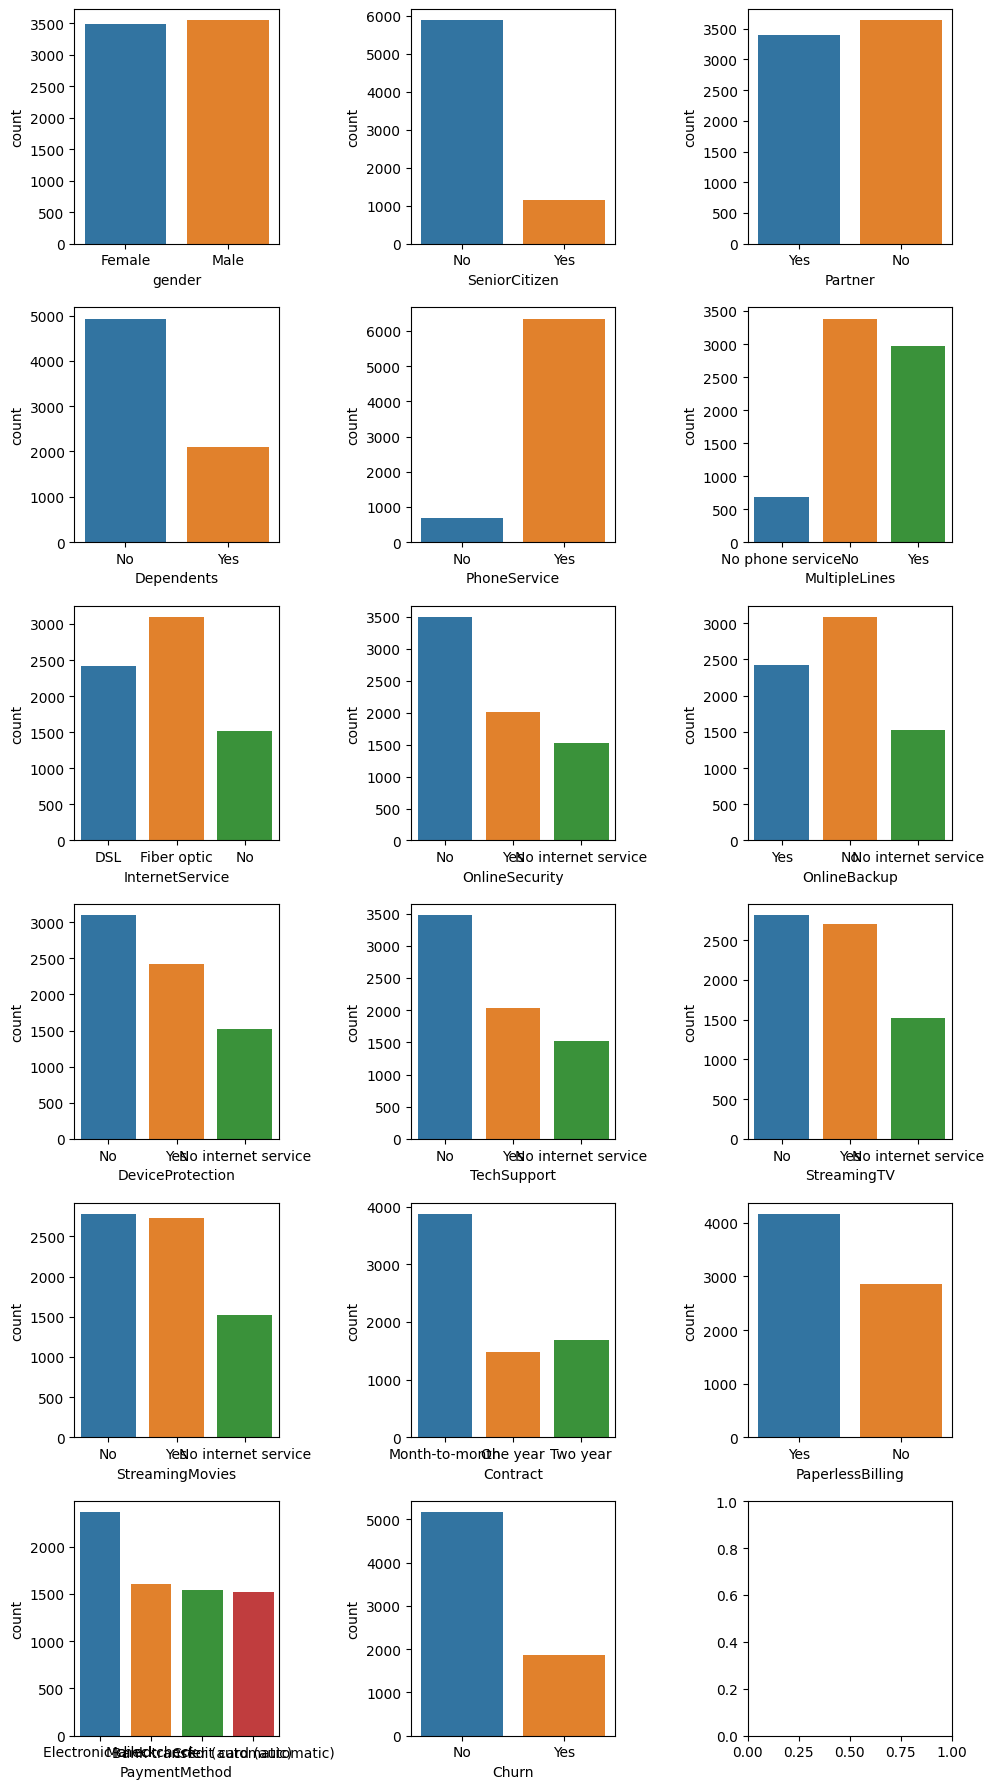

In [ ]:
num_cols = len(categoricals)
num_rows = (num_cols - 1) // 3 + 1

fig, axes = plt.subplots(num_rows, 3, figsize=(10, 3*num_rows))

for i, column in enumerate(categoricals):
    row = i // 3
    col = i % 3
    sns.countplot(data=df, x=column, ax=axes[row, col])

plt.tight_layout()
plt.show()

Observations:

1. *gender* and *Partner* columns have "yes" or "no" values and both values are almost in the same counts.

2. *SeniorCitizen* column shows that most of the costumers are young citizen (5890), and the rest are senior citizen.

3. *Dependents* column shows that most of the costumers are have no dependent.

4. *PhoneService* and *MultipleLines* columns show that 680 of the costumers have no phone service.

5. *InternetService*,*OnlineSecurity*, *OnlineBackup*, *DeviceProtection*, *TechSupport*, *StreamingTV* and *StreamingMovies* columns show that 1520 of the costumers have no internet service.

6. *Contract* column show that most of the costumers are using month-to-month contract.

7. *PaperlessBilling* and *PaymentMethod* columns show that most of the costumers are using paperless billing with electronic check payment method.

8. And the *Churn* column shows that most of the costumers (5163) are still using the Telco service.

**Bivariate and Multivariate Analysis**

Now, based on the information from dataset, lets divide the features into the following groups:

1. Demographic features (*gender, SeniorCitizen, Partners and Dependents*)

2. Service-related features (*PhoneService*, *Multiplelines*, *InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV and StreamingMovies*)

3. Account information features (*Contract, PaymentMethod, PaperlessBilling* for categorical features and *Tenur, MonthlyCharges, and TotalCharges* for numerical features)

For each group, i’ll start by looking at the features distributions. Then, i’ll check the percentage of churn for each category to understand their relationship.

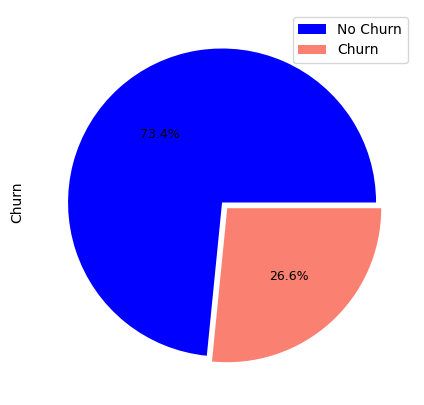

In [ ]:
# Fisrt of all, lets see the percentage of the Churn
plt.figure(figsize=(7,5))

df['Churn'].value_counts().plot(kind='pie',labels = ['',''], autopct='%1.1f%%', colors = ['blue','salmon'], explode = [0,0.05], textprops = {"fontsize":9})

plt.legend(labels=['No Churn', 'Churn'])
plt.show()

At the period represented in this dataset, there is a 26,6% rate of customer churn.

In [ ]:
# label encoding Churn to use sns.barplot
import numpy as np
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Churn'] = le.fit_transform(df['Churn'])
df['Churn'].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [ ]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2704,9640-ZSLDC,Female,No,Yes,Yes,53,Yes,No,DSL,No,...,Yes,No,No,Yes,One year,No,Credit card (automatic),60.60,3297.00,0
422,7663-ZTEGJ,Male,No,No,Yes,29,Yes,Yes,Fiber optic,No,...,Yes,Yes,No,Yes,One year,No,Credit card (automatic),100.55,2830.45,0
5541,6804-GDMOI,Female,No,No,No,61,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,106.60,6428.40,1
4714,0016-QLJIS,Female,No,Yes,Yes,65,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Mailed check,90.45,5957.90,0
119,9445-ZUEQE,Male,No,Yes,Yes,27,Yes,Yes,Fiber optic,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),85.20,2151.60,0


In [ ]:
demografi_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

service_features = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup'
                , 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

cat_accinfo_features = ['Contract', 'PaperlessBilling', 'PaymentMethod']

num_accinfo_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

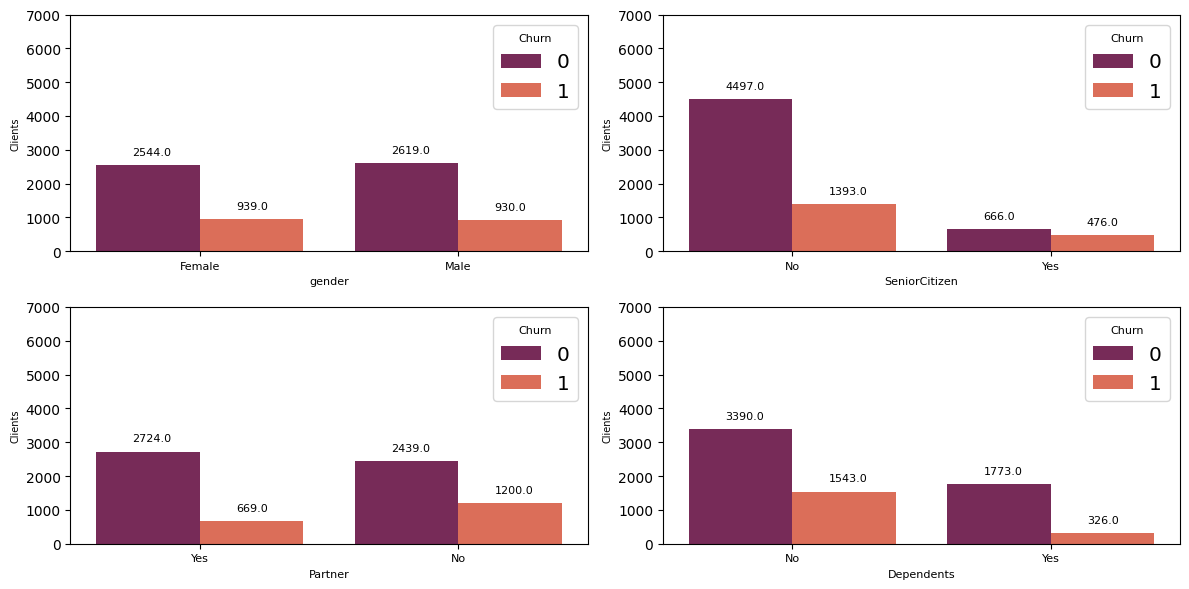

In [ ]:
# How the demografi features effect the costumer Churn?
plt.figure(figsize=(12,6))

for i,col in enumerate(demografi_features):
    plt.subplot(2,2,i + 1)

    ax = sns.countplot(data = df, x = col, hue="Churn", palette = 'rocket')

    plt.xlabel(col, fontsize= 8)
    plt.ylabel("Clients", fontsize= 7)
    plt.ylim(0,7000)
    plt.xticks(fontsize= 8)

    plt.legend(title = 'Churn', fontsize='x-large', title_fontsize='8')

    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.14, p.get_height()+300), fontsize= 8)

plt.tight_layout()

plt.show()

<ipython-input-27-7782ab8572f8>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x = col, y = "Churn", data = df, palette = 'rocket', ci = None)
<ipython-input-27-7782ab8572f8>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x = col, y = "Churn", data = df, palette = 'rocket', ci = None)
<ipython-input-27-7782ab8572f8>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x = col, y = "Churn", data = df, palette = 'rocket', ci = None)
<ipython-input-27-7782ab8572f8>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x = col, y = "Churn", data = df, palette = 'rocket', ci = None)


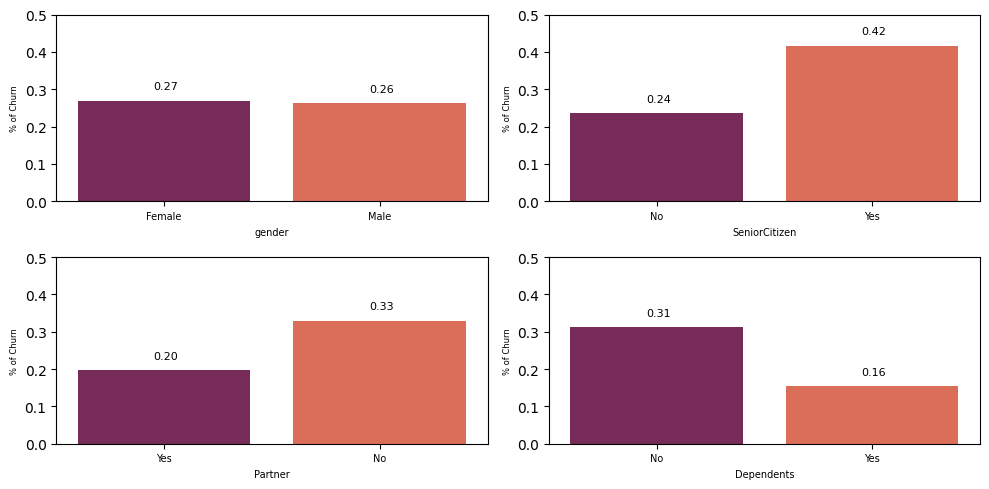

In [ ]:
plt.figure(figsize=(10,5))

for i,col in enumerate(demografi_features):
    plt.subplot(2,2,i + 1)

    ax = sns.barplot(x = col, y = "Churn", data = df, palette = 'rocket', ci = None)

    plt.xlabel(col, fontsize= 7)
    plt.ylabel("% of Churn", fontsize= 6)
    plt.ylim(0,0.5)
    plt.xticks(fontsize= 7)

    for p in ax.patches:
        ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.35, p.get_height()+0.03),fontsize=8)

plt.tight_layout()

plt.show()

What we can observe for each feature:

1. Gender: There is barely any difference in churn percentage between men and women;

2. Senior Citizen: The churn percentage for senior customers are above 40%, indicating a high probability of churn from that group;

3. Partner: Single customers are more likely to churn than customers with partners;

4. Dependents: Customers with dependents are less likely to churn than customers without any dependents.

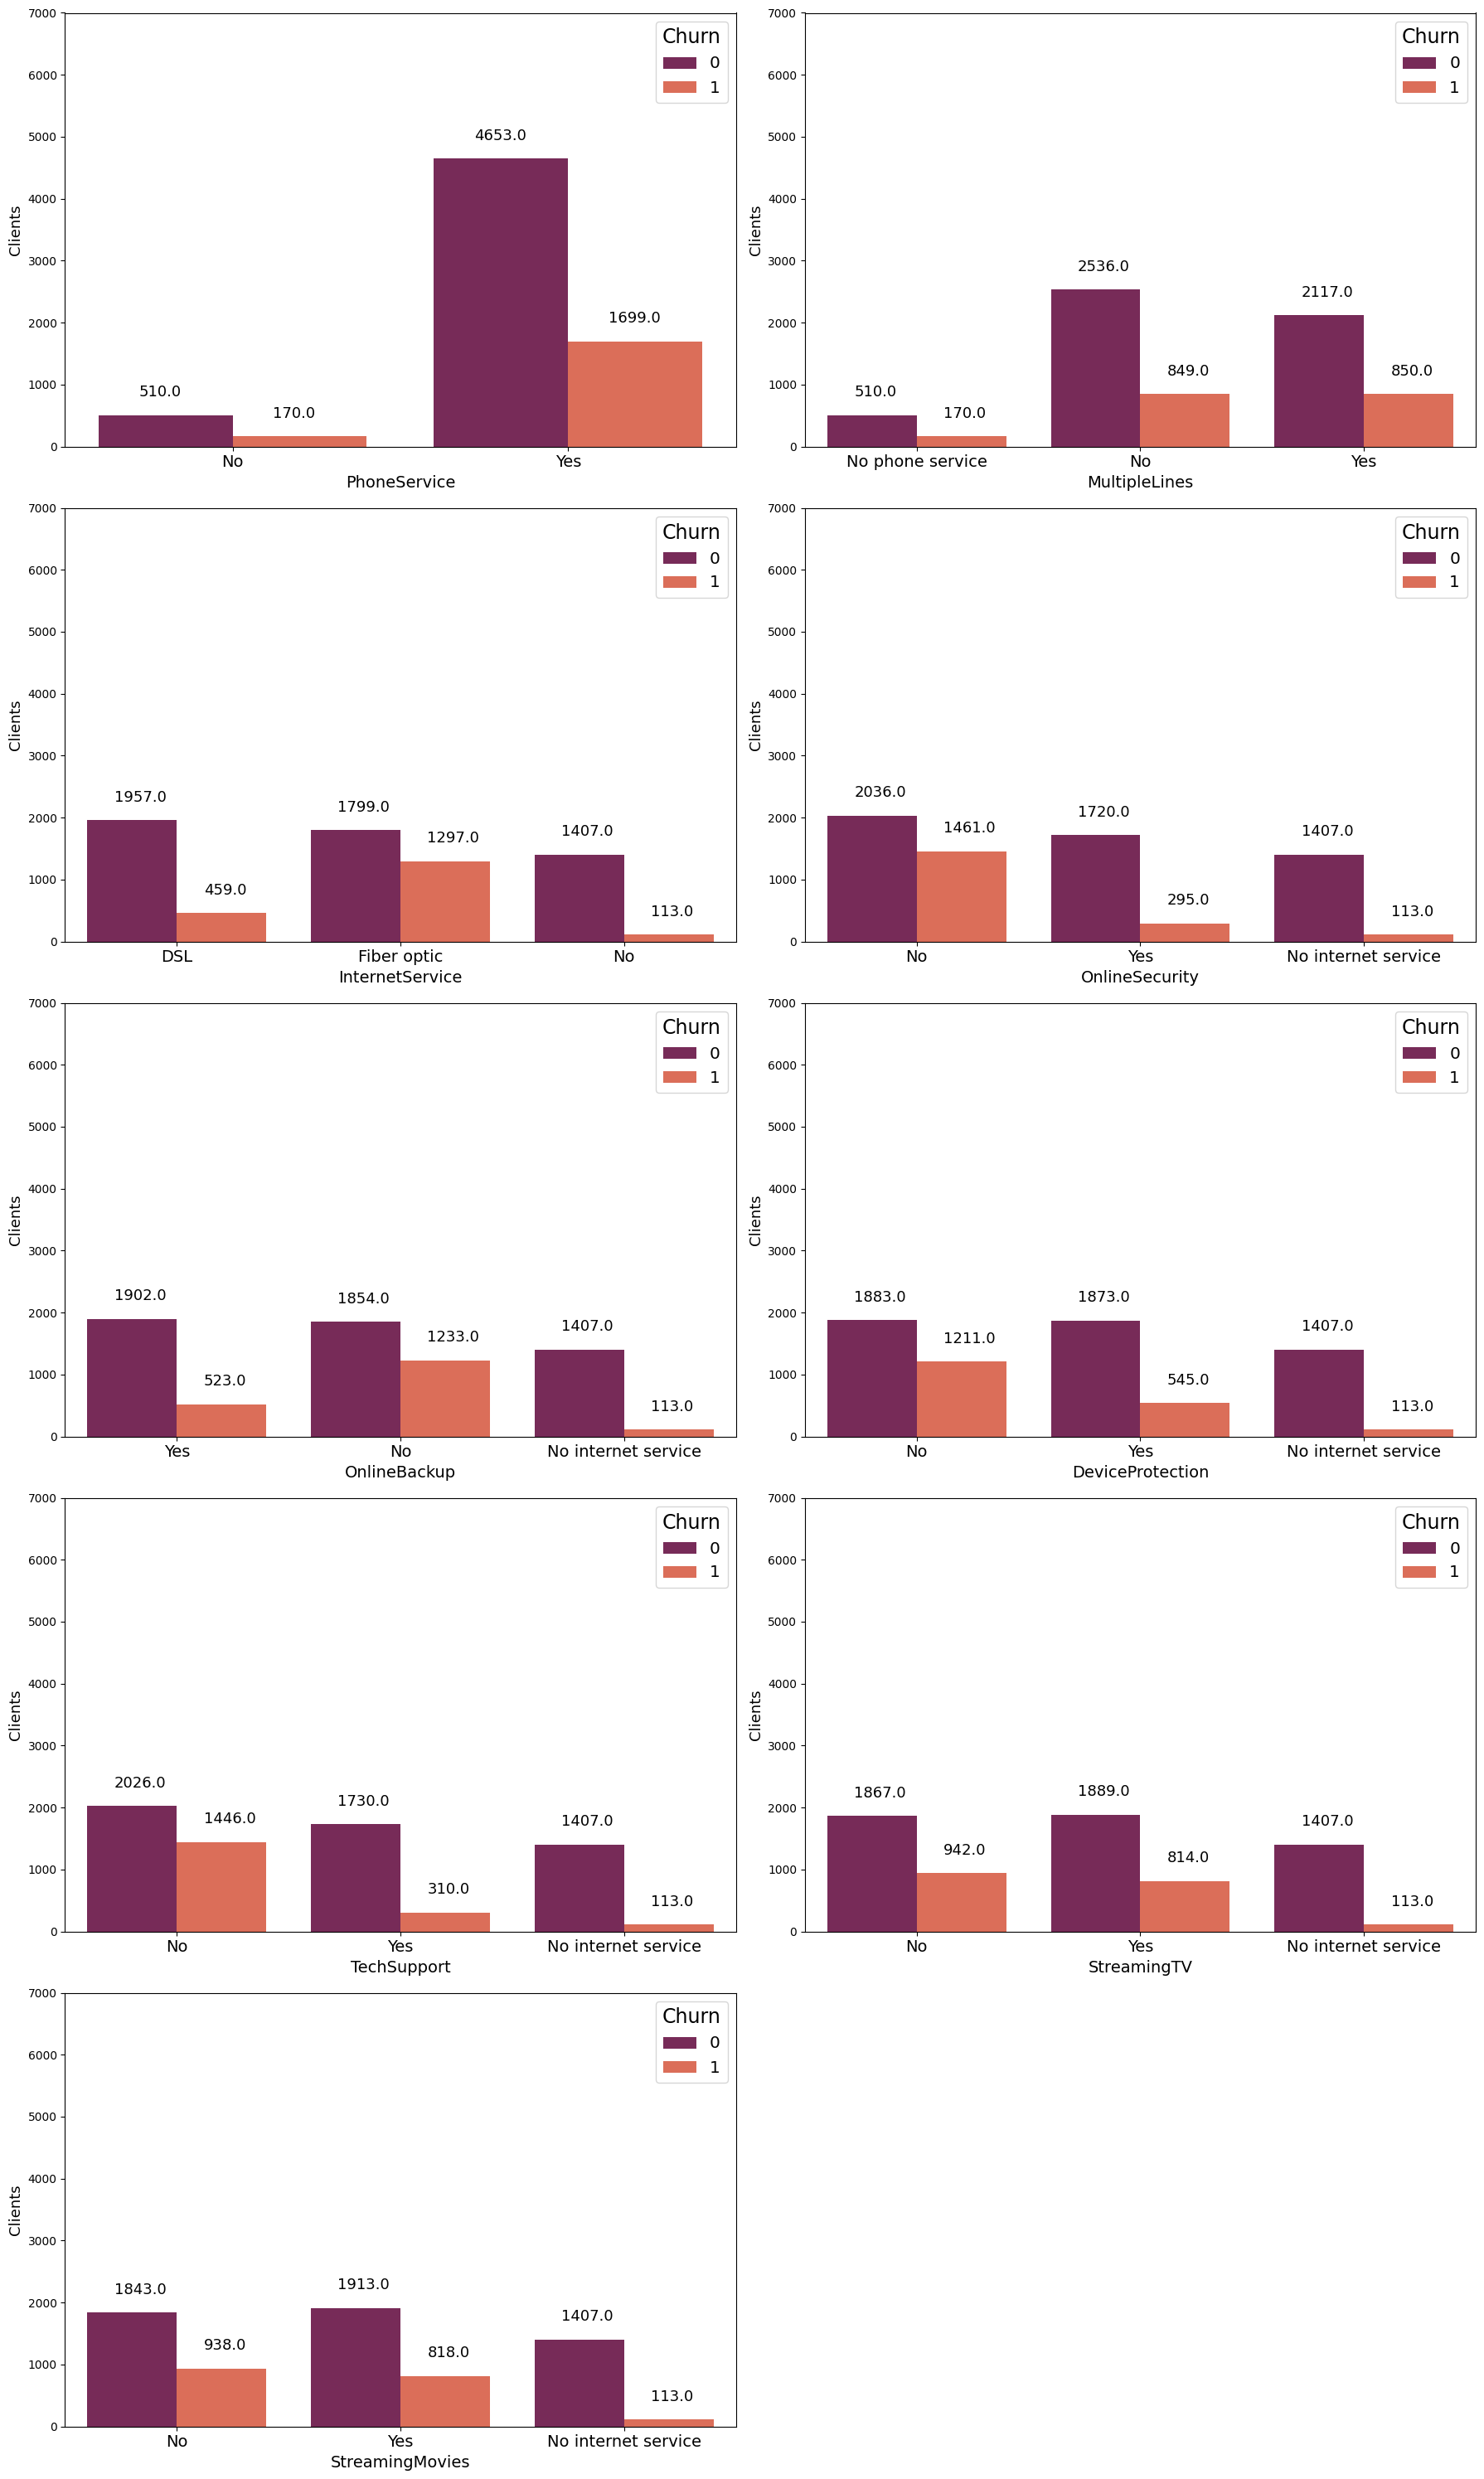

In [ ]:
# How the service-related features affect costumer churn?
plt.figure(figsize=(18,30))

for i,col in enumerate(service_features):
    plt.subplot(5,2,i + 1)

    ax = sns.countplot(data = df, x = col, hue="Churn", palette = 'rocket')

    plt.xlabel(col, fontsize= 14)
    plt.ylabel("Clients", fontsize= 13)
    plt.ylim(0,7000)
    plt.xticks(fontsize= 14)

    plt.legend(title = 'Churn', fontsize='x-large', title_fontsize='17')

    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.12, p.get_height()+300), fontsize= 13)

plt.tight_layout()

plt.show()

<ipython-input-52-3597a68353bc>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x = col, y = "Churn", data = df, palette = 'rocket', ci = None)
<ipython-input-52-3597a68353bc>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x = col, y = "Churn", data = df, palette = 'rocket', ci = None)
<ipython-input-52-3597a68353bc>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x = col, y = "Churn", data = df, palette = 'rocket', ci = None)
<ipython-input-52-3597a68353bc>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x = col, y = "Churn", data = df, palette = 'rocket', ci = None)
<ipython-input-52-3597a68353bc>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x = col, 

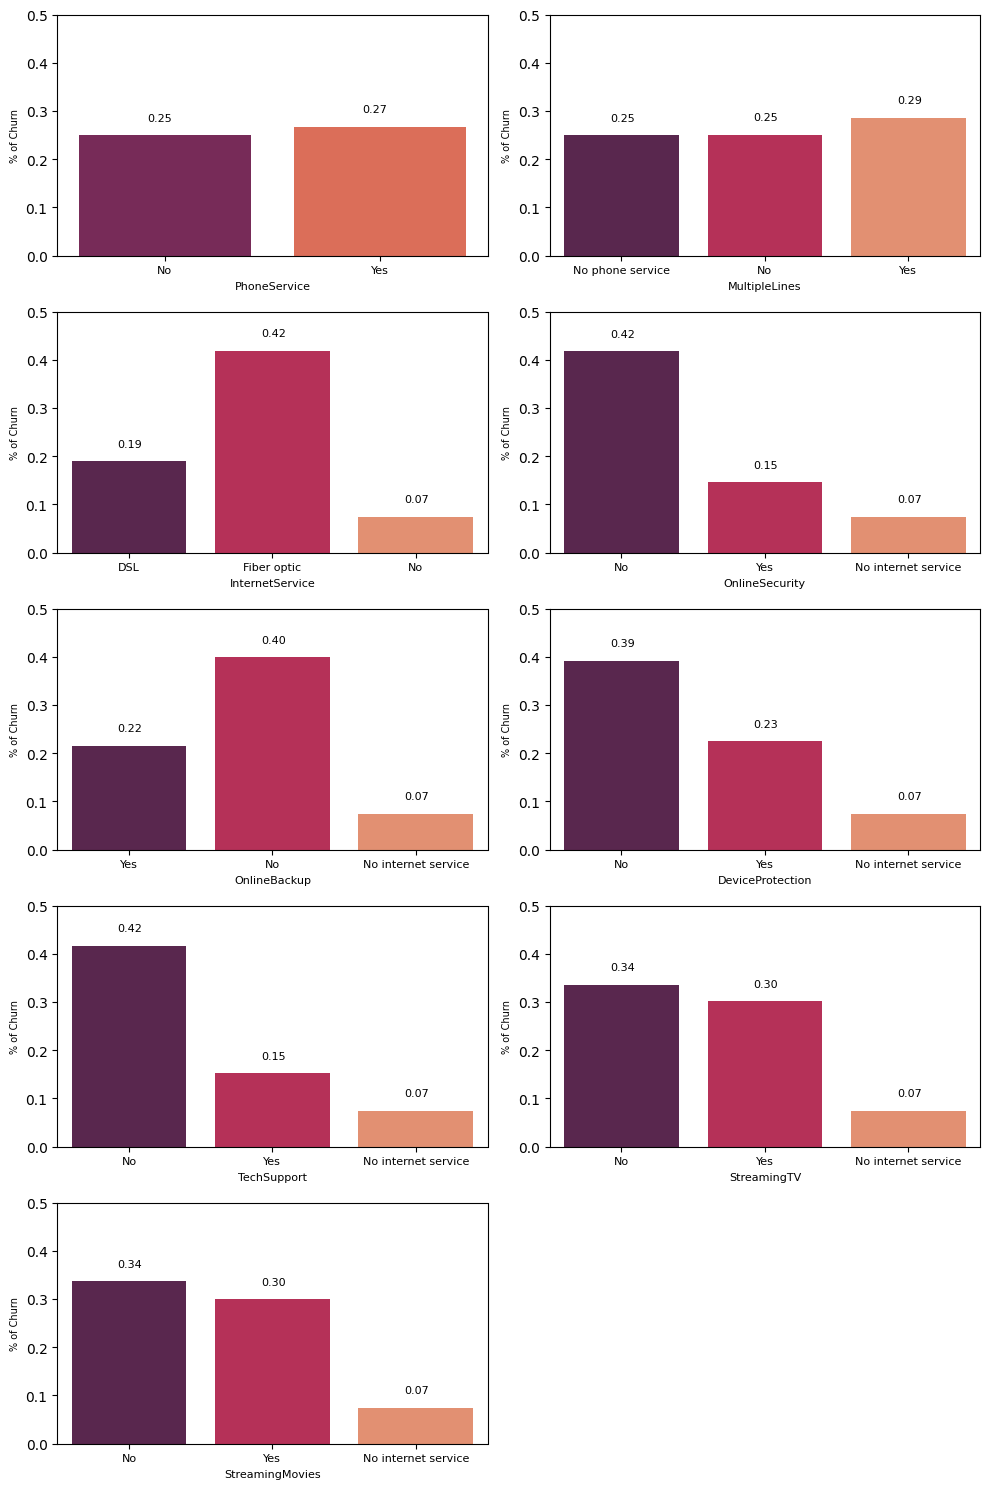

In [ ]:
# lets see the persentage of the feature affect
plt.figure(figsize=(10,15))

for i,col in enumerate(service_features):
    plt.subplot(5,2,i + 1)

    ax = sns.barplot(x = col, y = "Churn", data = df, palette = 'rocket', ci = None)

    plt.xlabel(col, fontsize= 8)
    plt.ylabel("% of Churn", fontsize= 7)
    plt.ylim(0,0.5)
    plt.xticks(fontsize= 8)

    for p in ax.patches:
        ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.32, p.get_height()+0.03),fontsize=8)

plt.tight_layout()

plt.show()

The difference of churn between clients with and without phone services is quite small, been negligible if we take those with multiple lines out of equation. In this group of features, the real game-changing ones in terms of customer retainment are those related to internet services.

In the feature ‘InternetServices’, the percentage of churn in each category is highly different one from another. Those who don’t subscribe to the company’s internet (presumably, they only use their phone service), are the most likely to endure as their customers. The likelihood of churn from customers with DSL service is also smaller than the overall probability.

The highest percentage of churn, with over 40%, is from customers with fiber optic internet. Fiber optic tends to be faster than DSL internet, but their subscription is usually more expensive as well.

Well, i don't have the information about the fee for each service, but at least i can try to find the mean value of monthly charges per type of internet just to have an idea that this is the case:

In [ ]:
df.groupby(by=['InternetService'])['MonthlyCharges'].mean().sort_values()

InternetService
No             21.076283
DSL            58.088017
Fiber optic    91.500129
Name: MonthlyCharges, dtype: float64

As i expected, the average charges for each service are significantly different, with fiber optic been the most expensive. Without any additional information, it’s hard to draw definitive conclusions, but it seems that the cost-benefit relationship of their fiber optic service is far from been attractive enough to retain customers.

Such a high churn rate might indicate that their service’s quality is subpar in terms of speed and/or reliability. Analyzing complaints received by their customer service call center service to extract useful and specific information about their internet is a must. A survey with a significant group of customers, aiming to understand how they perceive the quality of the service, is another step to find the problem and to help defining the course of action.

As for the other services, the likelihood of churn from customers who have each one of them is actually lower than from those who haven’t. The higher differences are found in ‘TechSupport’ and ‘OnlineSecurity’, while the lower ones are found in the streaming services.

Now, lets try to calculate the average monthly charges from each category in the Tech Support and Online Security features:

In [ ]:
print(df.groupby(by=['TechSupport'])['MonthlyCharges'].mean().sort_values(), '\n')
print(df.groupby(by=['OnlineSecurity'])['MonthlyCharges'].mean().sort_values(), '\n')
print(df.groupby(by=['OnlineSecurity', 'TechSupport'])['MonthlyCharges'].mean().sort_values())

TechSupport
No internet service    21.076283
No                     74.584879
Yes                    80.718799
Name: MonthlyCharges, dtype: float64 

OnlineSecurity
No internet service    21.076283
No                     75.693737
Yes                    78.870496
Name: MonthlyCharges, dtype: float64 

OnlineSecurity       TechSupport        
No internet service  No internet service    21.076283
No                   No                     74.188367
Yes                  No                     75.686398
No                   Yes                    79.764936
Yes                  Yes                    81.540374
Name: MonthlyCharges, dtype: float64


Both services don’t seem to affect the subscription charges by much. If the company can quantify the cost of providing each service per customer and find out that it is relatively small, they could either reduce the extra subscription fee for those additional services or simply cut that fee and offer those services as standard for internet customers for a trial period. Given that most customers don’t subscribe to those services and given that they have a significant impact on the customer retainment, it’s possible that such strategy could result in a higher profit on the long term.

Next, lets see if the churn rate gets significantly lower for customers who have access to both services:

In [ ]:
print(df.groupby(by=['TechSupport'])['OnlineSecurity'].value_counts(), '\n')

TechSupport          OnlineSecurity     
No                   No                     2553
                     Yes                     919
No internet service  No internet service    1520
Yes                  Yes                    1096
                     No                      944
Name: OnlineSecurity, dtype: int64 



<ipython-input-33-2717bdea27d5>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x = "TechSupport", y = "Churn", hue = "OnlineSecurity", data = df, palette = 'rocket', ci = None)


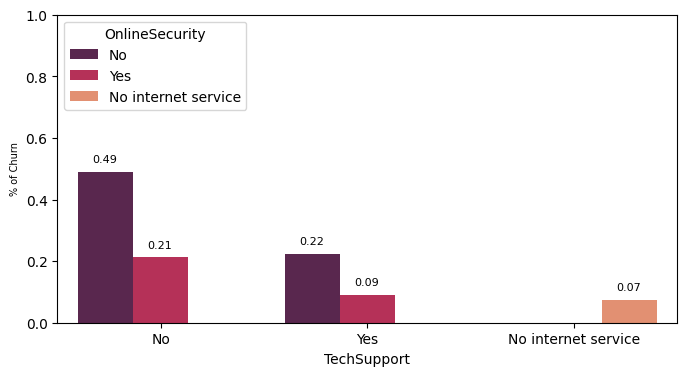

In [ ]:
plt.figure(figsize=(8,4))

ax = sns.barplot(x = "TechSupport", y = "Churn", hue = "OnlineSecurity", data = df, palette = 'rocket', ci = None)

plt.ylabel("% of Churn", fontsize= 7)
plt.ylim(0,1.0)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.070, p.get_height()+0.03),fontsize=8)

plt.show()


As i can see, the differences in terms of churn rate are quite significant. While customers who don’t use neither of those services have a close to 50% chance of churn, the churn rate for those who have both is lower than 10%, supporting the previous point.

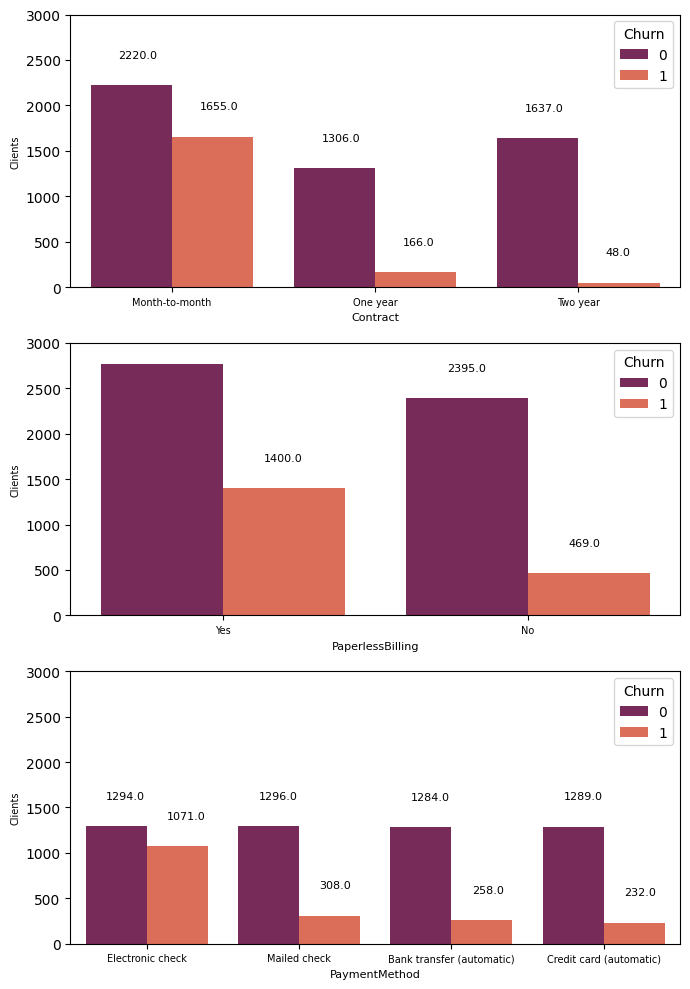

In [ ]:
# How account information from categorical features affect the costumer churn?
plt.figure(figsize=(7,10))

for i,col in enumerate(cat_accinfo_features):
    plt.subplot(3,1,i + 1)

    ax = sns.countplot(data = df, x = col, hue="Churn", palette = 'rocket')

    plt.xlabel(col, fontsize= 8)
    plt.ylabel("Clients", fontsize= 7)
    plt.ylim(0,3000)
    plt.xticks(fontsize= 7)

    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.135, p.get_height()+300), fontsize= 8)

plt.tight_layout()

plt.show()

<ipython-input-35-cef49f535b7a>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x = col, y = "Churn", data = df, palette = 'rocket', ci = None)
<ipython-input-35-cef49f535b7a>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x = col, y = "Churn", data = df, palette = 'rocket', ci = None)
<ipython-input-35-cef49f535b7a>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x = col, y = "Churn", data = df, palette = 'rocket', ci = None)


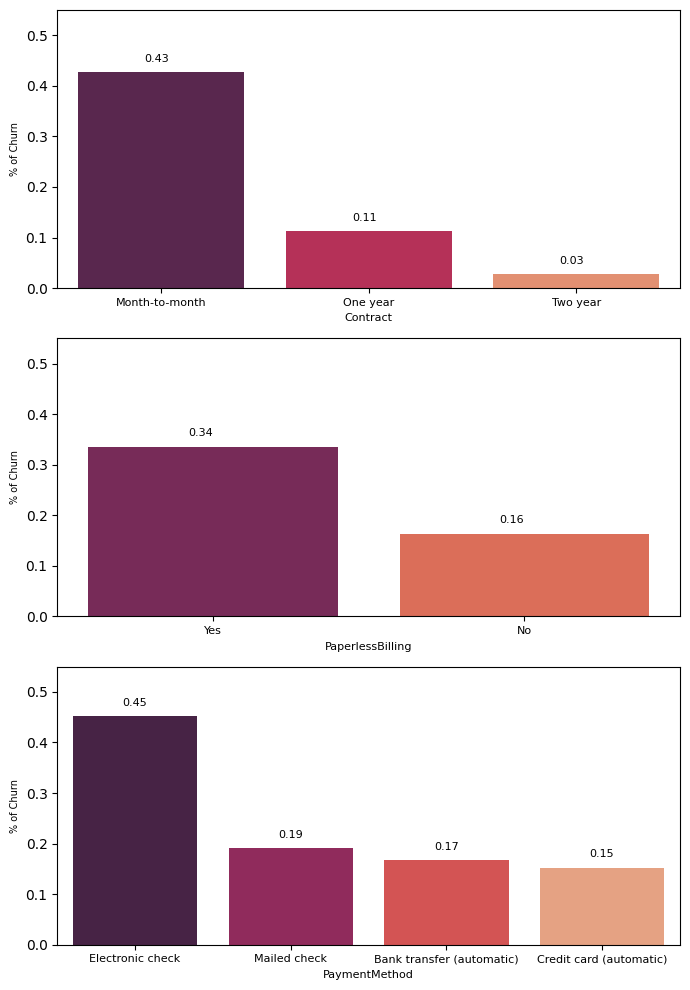

In [ ]:
# Lets see the percentage of features affect
plt.figure(figsize=(7,10))

for i,col in enumerate(cat_accinfo_features):
    plt.subplot(3,1,i + 1)

    ax = sns.barplot(x = col, y = "Churn", data = df, palette = 'rocket', ci = None)

    plt.xlabel(col, fontsize= 8)
    plt.ylabel("% of Churn", fontsize= 7)
    plt.ylim(0,0.55)
    plt.xticks(fontsize= 8)

    for p in ax.patches:
        ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.32, p.get_height()+0.02),fontsize=8)

plt.tight_layout()
plt.show()

Naturally, in terms of contract, the highest churn rate is from the ‘month-to-month’ type, which is also the most dominant contract. What seems odd is the high chance of churn from customers who choose electronic check as payment method and opts for paperless billing. It could be, for instance, that most customers in the month-to-month contract also fall into those categories.

<ipython-input-36-5d7914936aef>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.loc[(df['Churn'] == 0), col], label = 'No Churn', shade = True)
<ipython-input-36-5d7914936aef>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.loc[(df['Churn'] == 1), col], label = 'Churn', shade = True)
<ipython-input-36-5d7914936aef>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.loc[(df['Churn'] == 0), col], label = 'No Churn', shade = True)
<ipython-input-36-5d7914936aef>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your cod

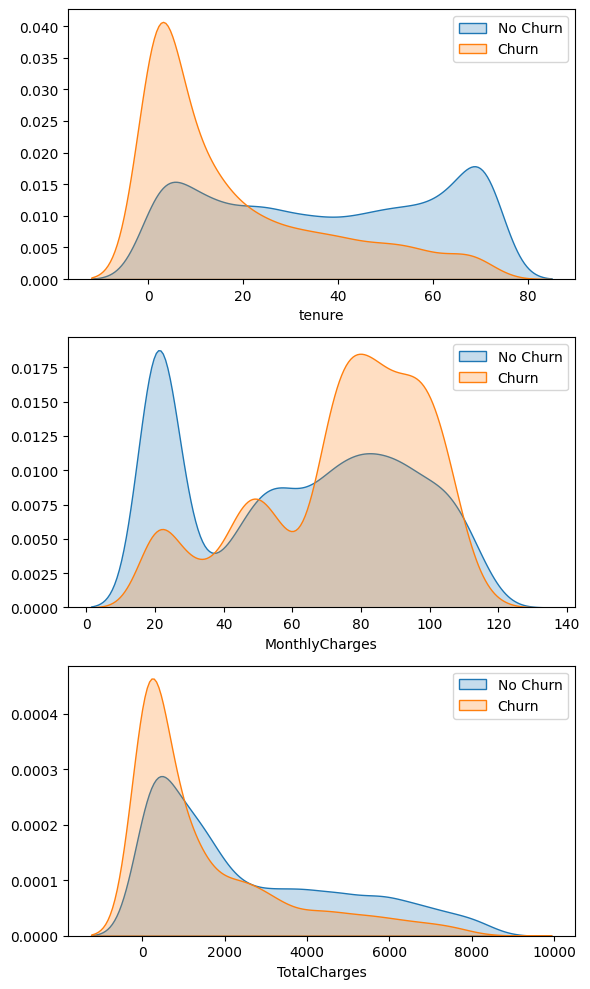

In [ ]:
# Last but no least, how account information from numerical features affect the costumer churn?
plt.figure(figsize=(6,10))

for i,col in enumerate(num_accinfo_features):
    plt.subplot(3,1,i + 1)
    sns.kdeplot(df.loc[(df['Churn'] == 0), col], label = 'No Churn', shade = True)
    sns.kdeplot(df.loc[(df['Churn'] == 1), col], label = 'Churn', shade = True)
    plt.legend()
    plt.ylabel('')
    plt.tight_layout()

plt.show()

What we can observe for each feature:

1. Tenure: High concentration of churned customer in the first months.

2. Monthly Charges: High concentration of churned customer in higher values (around 60 and beyond).

3. Total Charges: Somewhat similar distributions, but the ‘No churn’ distribution have lower values.

In [ ]:
# i'll make a copy of dataframe before encode the categorical feature to make a heatmap correlation
# because i want to see not only numeric feature but all the features included
df_copy = df.copy()

In [ ]:
# encode all the categorical features
df_encoded = pd.get_dummies(df_copy, columns=categoricals)

# Atau menggunakan label encoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for col in categoricals:
    df_copy[col] = label_encoder.fit_transform(df_copy[col])

In [ ]:
df_copy.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


<ipython-input-40-4001d363650e>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df_copy.corr()


<Axes: >

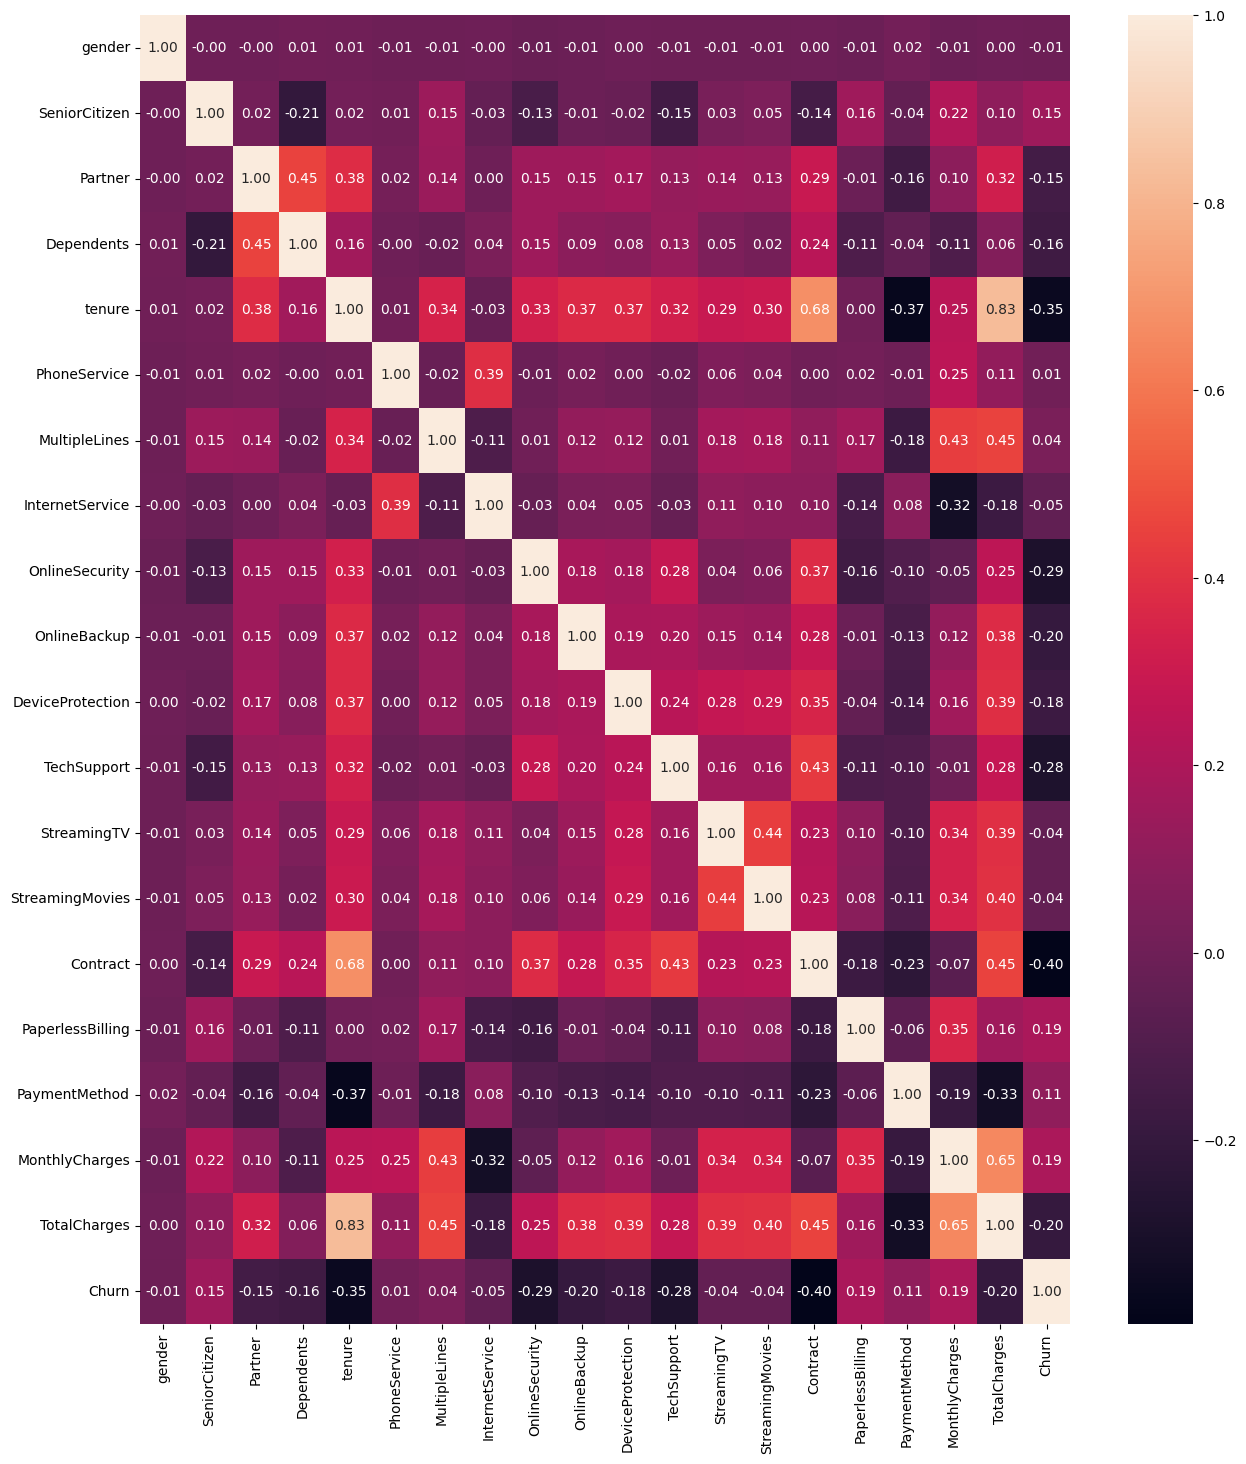

In [ ]:
# Lets check correlation heatmap
plt.figure(figsize=(15,17))
correlation = df_copy.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

The heatmap shows that the highest correlation feature is between tenure and TotalCharges (0.83). And then the second one is correlation between Contract and tenure (0.68).

Then, considered to the churn, tenure has a moderately negative correlation with churn (-0.35), indicating that as the tenure increases, the likelihood of churn decreases. This suggests that customers who have been with the company for a longer time are more likely to stay.
MonthlyCharges show a moderate positive correlation with churn (0.19), suggesting that customers with higher monthly charges are slightly more likely to churn. This indicates that pricing may play a role in customer retention, with higher charges potentially leading to higher churn rates.
TotalCharges exhibit a weak negative correlation with churn (-0.20), implying that customers with higher total charges are slightly less likely to churn. This suggests that customers who have spent more with the company are more likely to stay.
The correlations between other features and churn are relatively weak, indicating that these factors may have less influence on customer churn.

## **Deep-Dive Exploration**

**Question 1**: How does the monthly charges vary between different internet service types and payment methods?

In [ ]:
monthly_charges_by_internet_payment = df.groupby(['InternetService', 'PaymentMethod']).agg(
    Monthly_Charge_Avg_By_Internet_Payment=('MonthlyCharges', 'mean')
)

monthly_charges_by_internet_payment

Monthly_Charge_Avg_By_Internet_Payment
InternetService PaymentMethod                                                    
DSL             Bank transfer (automatic)                               62.568972
                Credit card (automatic)                                 63.017454
                Electronic check                                        53.553009
                Mailed check                                            53.977169
Fiber optic     Bank transfer (automatic)                               94.729954
                Credit card (automatic)                                 95.004523
                Electronic check                                        89.684295
                Mailed check                                            86.529845
No              Bank transfer (automatic)                               21.525753
                Credit card (automatic)                                 21.416163
                Electronic check                                        21.280328
                Mailed check                                            20.686327

**Question 2**: What are the top 10 customer with the longest tenure and highest money spend who have churned?

In [ ]:
churned = df[df['Churn'].isin([1])]

In [ ]:
churned_customers = df[df['Churn'] == 1]
top_10_churned_customers = churned_customers.sort_values(by=['tenure', 'TotalCharges'], ascending=[False, False]).head(10)


top_10_churned_customers = top_10_churned_customers[['customerID', 'tenure', 'TotalCharges', 'Churn']]
top_10_churned_customers

,customerID,tenure,TotalCharges,Churn
4610,2889-FPWRM,72,8684.80,1
3890,3886-CERTZ,72,8109.80,1
3439,0917-EZOLA,72,7689.95,1
3111,8809-RIHDD,72,7372.65,1
4513,8580-QVLOC,72,6440.25,1
6424,6034-ZRYCV,72,3937.45,1
6398,3259-FDWOY,71,7723.70,1
3040,7317-GGVPB,71,7690.90,1
5702,5287-QWLKY,71,7548.10,1
975,2834-JRTUA,71,7532.15,1


### **Thank you :)**